In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, accuracy_score, classification_report
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.svm import LinearSVC

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import re
import datetime as dt

from pybaseball import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold

import seaborn as sb
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [3]:
def makeOverSamplesSMOTE(X,y):
    #input DataFrame
    #X →Independent Variable in DataFrame\
    #y →dependent Variable in Pandas DataFrame format
    from imblearn.over_sampling import SMOTE
    sm = SMOTE()
    X, y = sm.fit_sample(X, y)
    return X,y

In [4]:
def makeOverSamplesADASYN(X,y):
    #input DataFrame
    #X →Independent Variable in DataFrame\
    #y →dependent Variable in Pandas DataFrame format
    from imblearn.over_sampling import ADASYN 
    sm = ADASYN()
    X, y = sm.fit_sample(X, y)
    return(X,y)

In [5]:
def ros(X,y):
    #input DataFrame
    #X →Independent Variable in DataFrame\
    #y →dependent Variable in Pandas DataFrame format
    from imblearn.over_sampling import RandomOverSampler
    sm = RandomOverSampler(random_state=0)
    X, y = sm.fit_sample(X, y)
    return(X,y)

In [6]:
X = pd.read_pickle('../pickles/xframe.pkl')

In [7]:
y = X.pop('injured?')

In [10]:
X.head()

,age,appearance_yr,babip,bb,bf,days_rest,er,gb/fb,h,hbp,hr,ip,mlb_played_first_x,pit,r,so,so9,str,w,whip,fb_count,fb_release_speed,fb_percieved_speed,fb_spin_rate,fb_avg_x,fb_avg_z,fb_avg_extension,fb_x_movement,fb_z_movement,os_count,os_release_speed,os_percieved_speed,os_spin_rate,os_avg_x,os_avg_z,os_avg_extension,os_x_movement,os_z_movement,delta_fb_release_speed,delta_fb_percieved_speed,delta_fb_spin_rate,delta_fb_avg_x,delta_fb_avg_z,delta_fb_avg_extension,delta_fb_x_movement,delta_fb_z_movement,delta_os_release_speed,delta_os_percieved_speed,delta_os_spin_rate,delta_os_avg_x,delta_os_avg_z,delta_os_avg_extension,delta_os_x_movement,delta_os_z_movement,delta_fb_count,delta_os_count,0,L,R
0,42.0,1,0.154,1.0,23.0,182.0,1.0,0.64,3.0,0.0,1.0,6.0,1997.0,86.0,1.0,8.0,12.0,0.69,1.0,0.667,0.883721,89.784211,88.202553,2280.710526,-1.481718,5.916537,5.605737,-1.026215,1.276848,0.116279,83.540000,81.596556,2469.444444,-1.733989,5.992122,5.262667,0.046602,0.628567,-1.571627,-1.937016,-132.305477,0.150396,-0.208972,-0.343583,-0.177165,-0.278786,-1.754849,-1.646236,-489.325658,0.266443,-0.326211,-0.135806,-0.543012,0.007690,-0.043328,0.043328,0,0,1
1,42.0,2,0.238,0.0,27.0,6.0,3.0,0.33,6.0,0.0,1.0,7.0,1997.0,77.0,3.0,5.0,6.4,0.78,1.0,0.857,0.922078,88.569014,86.327366,2133.971831,-1.161156,5.956703,5.049437,-0.843298,1.237249,0.077922,82.000000,80.086500,1761.833333,-1.357450,6.000083,4.996000,-0.546108,0.733678,-0.356431,-0.061829,14.433219,-0.170166,-0.249138,0.212717,-0.360082,-0.239186,-0.214849,-0.136181,218.285453,-0.110096,-0.334173,0.130860,0.049698,-0.097421,-0.081685,0.081685,0,0,1
2,42.0,3,0.250,0.0,26.0,5.0,1.0,0.43,6.0,0.0,1.0,7.0,1997.0,91.0,1.0,5.0,6.4,0.73,1.0,0.857,0.835165,89.246053,87.101987,2193.346667,-1.295146,6.124792,5.372947,-1.087467,1.038179,0.164835,82.940000,80.848267,1817.461538,-1.520147,6.105167,5.204200,-0.449991,0.594358,-1.033469,-0.836450,-44.941617,-0.036176,-0.417227,-0.110793,-0.115913,-0.040117,-1.154849,-0.897947,162.657248,0.052600,-0.439256,-0.077340,-0.046419,0.041899,0.005228,-0.005228,0,0,1
3,42.0,4,0.368,0.0,24.0,6.0,3.0,0.22,7.0,0.0,0.0,6.0,1997.0,88.0,3.0,5.0,7.5,0.66,1.0,1.167,0.909091,89.025000,86.779882,2196.473684,-1.227378,6.096868,5.243171,-1.292720,1.116850,0.125000,81.936364,79.716000,2036.363636,-1.438264,6.180809,5.089818,-0.711843,0.584264,-0.812417,-0.514345,-48.068634,-0.103944,-0.389303,0.018983,0.089340,-0.118787,-0.151213,0.234319,-56.244850,-0.029283,-0.514898,0.037042,0.215433,0.051993,-0.068698,0.034607,0,0,1
4,42.0,5,0.333,0.0,29.0,6.0,4.0,0.48,9.0,0.0,1.0,6.2,1997.0,91.0,4.0,2.0,2.7,0.70,0.0,1.350,0.791209,88.462500,86.099380,2192.563380,-0.902362,6.524101,5.158310,-1.210262,1.227521,0.186813,82.476471,79.931938,2331.312500,-1.208682,6.446600,4.900688,-0.017521,0.677131,-0.249917,0.166157,-44.158330,-0.428959,-0.816536,0.103844,0.006882,-0.229458,-0.691320,0.018382,-351.193714,-0.258864,-0.780689,0.226173,-0.478889,-0.040875,0.049184,-0.027206,0,0,1


In [13]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.5,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.5,
                     color='b')
#     plt.ylim([0.5, 1.01]);
#     plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.8
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    roc_auc = auc(fpr,tpr)
    
    plt.figure(figsize=(8,8))    
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label='{}_AUC = %0.3f'.format(label)% roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

In [20]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [97]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=.33, random_state=42)
# X_train_smote, y_train_smote = makeOverSamplesSMOTE(X_train, y_train)
# X_train_std_smote, y_train_std_smote = makeOverSamplesSMOTE(X_train_std , y_train_std)
# X_train_ada, y_train_ada = makeOverSamplesADASYN(X_train, y_train)
# X_train_std_ada, y_train_std_ada = makeOverSamplesADASYN(X_train_std , y_train_std)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=42)
X_train, y_train = ros(X_train, y_train)

In [16]:
clf = RandomForestClassifier(n_jobs=-1, max_depth=5, max_features=5)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [500],
    'max_depth': [3, 5, 8],
    'max_features': [3, 5, 8]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'AUC': 'roc_auc'
}

In [17]:
def grid_search_wrapper(refit_score='roc_auc'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=False, n_jobs=-1, verbose = 5)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [18]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

# scores = cross_val_predict(clf, X_train, y_train, cv=skf)
scores = cross_validate(clf, X_train, y_train, scoring='roc_auc', cv=skf, return_train_score=True)
# fpr, tpr, auc_thresholds = roc_curve(y_test, scores)
# print(auc(fpr, tpr))

print(len(scores))
print(scores)
scores['test_score'].mean()

4
{'fit_time': array([0.37910604, 0.35500407, 0.34736204, 0.35465097, 0.35714412,
       0.44446182, 0.35573506, 0.35320306, 0.35889602, 0.35189605]), 'score_time': array([0.11487699, 0.114604  , 0.10884786, 0.1146369 , 0.11487985,
       0.10826421, 0.11311102, 0.11167789, 0.11440802, 0.11468911]), 'test_score': array([0.81178886, 0.83400322, 0.81575089, 0.8248831 , 0.81743376,
       0.8188169 , 0.81779237, 0.82038517, 0.83462164, 0.83031859]), 'train_score': array([0.81586501, 0.82911843, 0.81575051, 0.82526442, 0.82732901,
       0.82176948, 0.82694527, 0.81800731, 0.83257157, 0.83044566])}


0.8225794492768305

In [19]:
# grid_search_clf = grid_search_wrapper(refit_score='AUC')

In [21]:
clf = LogisticRegression(C=6, class_weight='balanced')
clf.fit(X_train, y_train)

LogisticRegression(C=6, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [22]:
# clf = LinearSVC(class_weight='balanced')
# clf.fit(X_train, y_train)

0.7187731584132191
Recall metric in the testing dataset: 41.51624548736462%
Precision metric in the testing dataset: 2.7122641509433962%
Accuracy metric in the testing dataset: 84.10043392797537%


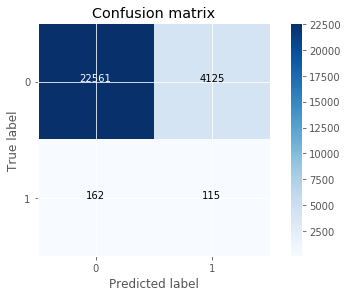

In [26]:
threshold = .5
predicted_proba = clf.decision_function(X_test)
predicted = (predicted_proba >= threshold).astype('int')

y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predicted)

fpr, tpr, auc_thresholds = roc_curve(y_test, predicted_proba)
print(auc(fpr, tpr))

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])))
print("Accuracy metric in the testing dataset: {}%".format(100*(cnf_matrix[0,0] + cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0])))
# {tp+tn}/{tp+tn+fp+fn}}
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

0.7187731584132191
     pred_neg  pred_pos
neg     22561      4125
pos       162       115


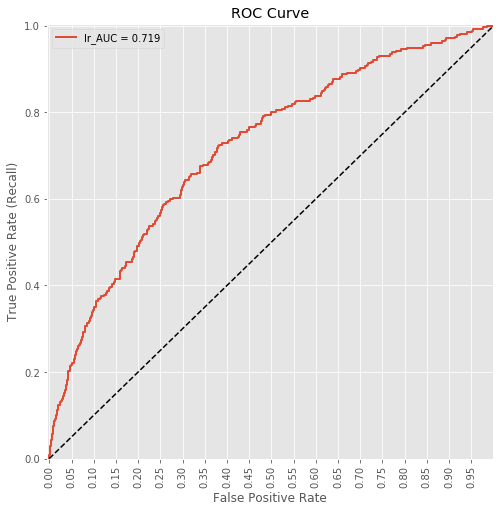

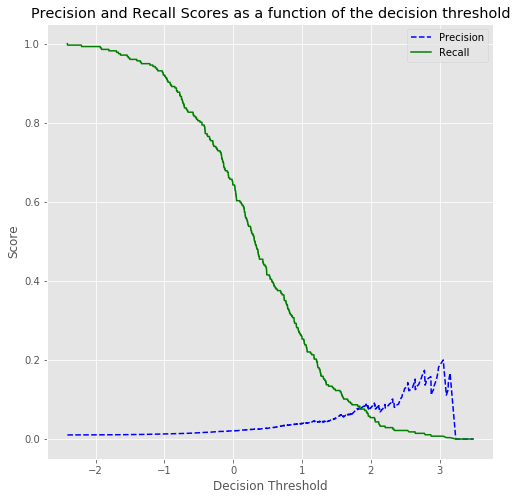

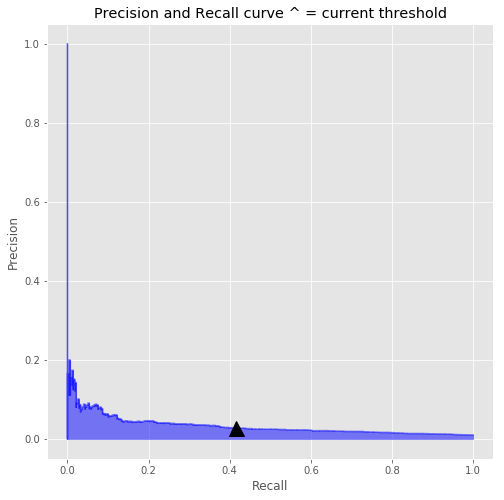

In [27]:
y_scores = clf.decision_function(X_test)

p, r, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'lr')
plot_precision_recall_vs_threshold(p, r, thresholds)
precision_recall_threshold(p, r, thresholds, .5)

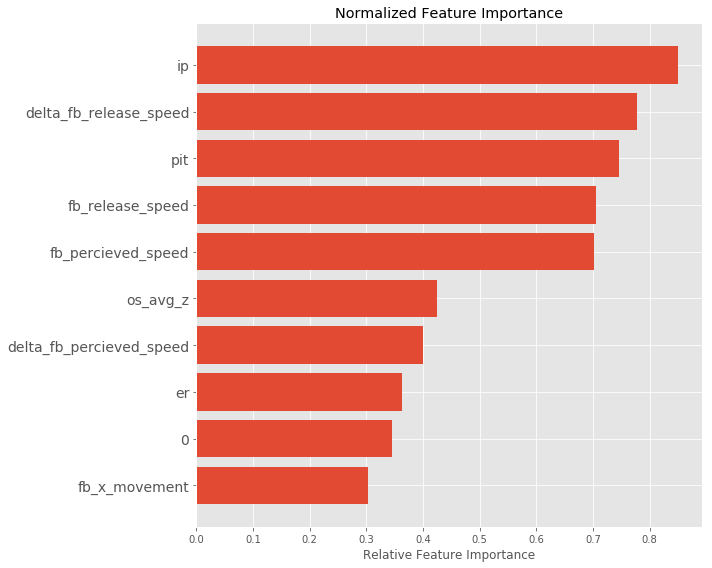

In [28]:
feature_importance = abs(clf.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5


n_feat = 10
featfig = plt.figure(figsize=(10,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos[-n_feat:], feature_importance[sorted_idx][-n_feat:], align='center')
featax.set_yticks(pos[-n_feat:])
featax.set_yticklabels(np.array(X.columns)[sorted_idx][-n_feat:], fontsize=14)
featax.set_xlabel('Relative Feature Importance')
featax.set_title('Normalized Feature Importance')

plt.tight_layout()   
plt.show()

In [32]:
# rf = RandomForestClassifier(n_estimators = 300, class_weight='balanced', n_jobs=-1, oob_score=True, max_depth=3, max_features=3)
rf = RandomForestClassifier(n_estimators = 1000, n_jobs=-1, oob_score=True, max_depth=6, max_features='sqrt', class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=True,
            random_state=None, verbose=0, warm_start=False)

0.7550258914272712
Recall metric in the testing dataset: 56.31768953068592%
Precision metric in the testing dataset: 2.780253074318303%
Accuracy metric in the testing dataset: 79.3198086266365%


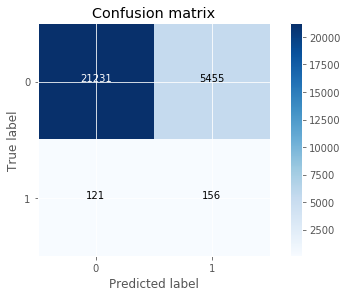

In [47]:
threshold = 0.5
predicted_proba = rf.predict_proba(X_test)[:, 1]
predicted = (predicted_proba >= threshold).astype('int')

y_pred = rf.predict(X_test)
cnf_matrix_rf = confusion_matrix(y_test, predicted)

fpr, tpr, auc_thresholds = roc_curve(y_test, predicted_proba)
print(auc(fpr, tpr))

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix_rf[1,1]/(cnf_matrix_rf[1,0]+cnf_matrix_rf[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix_rf[1,1]/(cnf_matrix_rf[0,1]+cnf_matrix_rf[1,1])))
print("Accuracy metric in the testing dataset: {}%".format(100*(cnf_matrix_rf[0,0] + cnf_matrix_rf[1,1])/(cnf_matrix_rf[0,0]+cnf_matrix_rf[1,1]+cnf_matrix_rf[0,1]+cnf_matrix_rf[1,0])))
# {tp+tn}/{tp+tn+fp+fn}}
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_rf , classes=class_names, title='Confusion matrix')
plt.show()

     pred_neg  pred_pos
neg     23121      3565
pos       155       122


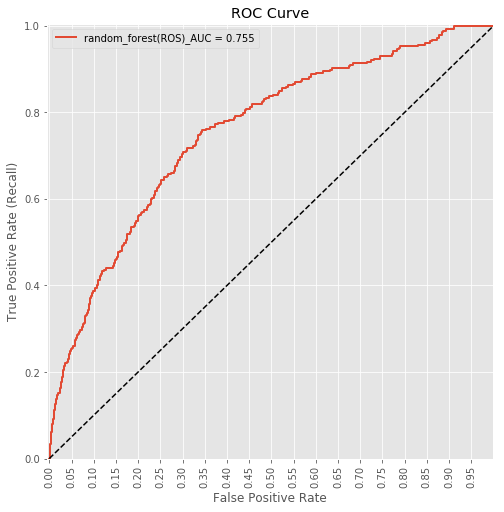

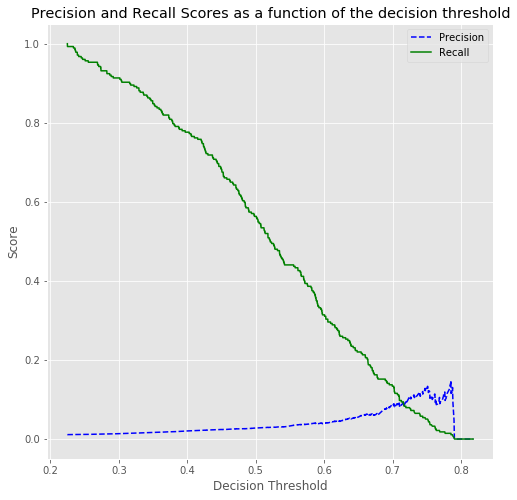

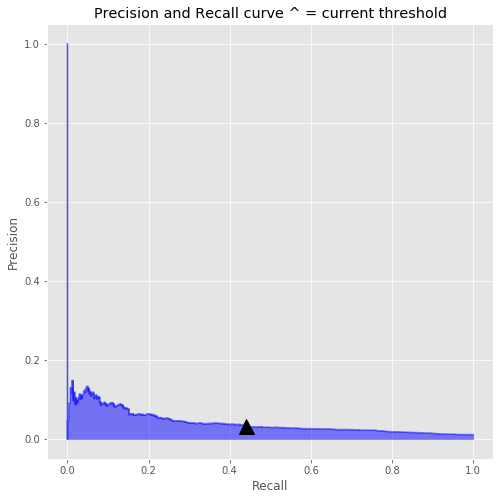

In [41]:
y_scores = rf.predict_proba(X_test)[:, 1]

p, r, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
# print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'random_forest(ROS)')
plot_precision_recall_vs_threshold(p, r, thresholds)
precision_recall_threshold(p, r, thresholds, .55)

In [42]:
threshold = 0.55

predicted_proba = rf.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)
accuracy

0.8620331565478618

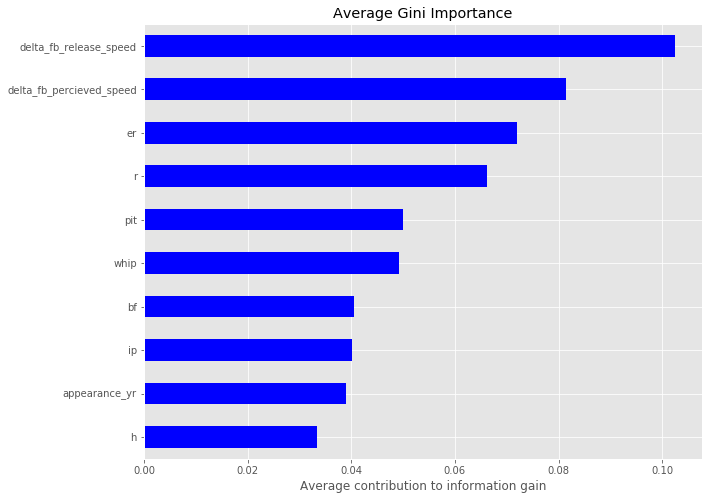

In [43]:
feat_scores = pd.Series(rf.feature_importances_,
                           index=X.columns)
feat_scores = feat_scores.sort_values()[-10:]
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

In [44]:
covar_matrix = PCA(.90)
covar_matrix.fit(X_train)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([12.4, 21.6, 28.5, 34.2, 39.6, 44.7, 49. , 52.9, 56.4, 59.8, 62.7,
       65.5, 68.1, 70.5, 72.8, 74.9, 76.9, 78.7, 80.4, 82. , 83.4, 84.7,
       86. , 87.2, 88.4, 89.5, 90.5])

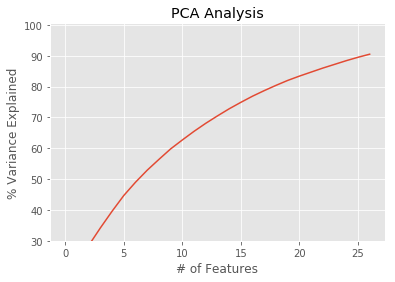

In [45]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [46]:
covar_matrix.n_components_

27